In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load California Housing Dataset

In [385]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [386]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [387]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [388]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [389]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [390]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [391]:
## Preparing the dataset

In [392]:
dataset = pd.DataFrame(housing.data, columns=housing.feature_names)

In [393]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [394]:
dataset['MedHouseVal'] = housing.target

In [395]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [396]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [397]:
## stats of the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [398]:
## Check the missing values
dataset.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

# Exploratory Data Analysis

In [399]:
## Exploratory data analysis
## Correlation

dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


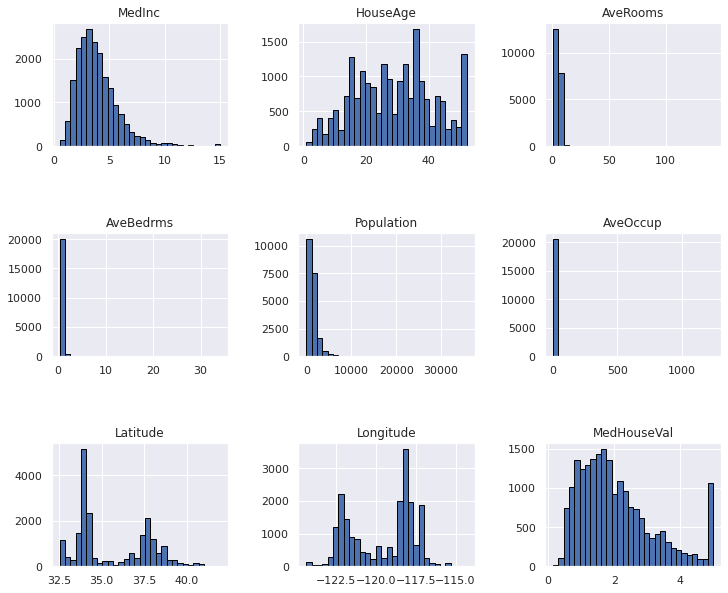

In [400]:
dataset.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [401]:
## The price has a long tail. 
## In addition, we have a threshold-effect for high-valued houses: 
## all houses with a price above 5 are given the value 5

In [402]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
dataset[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


In [403]:
## For each of these features, comparing the max and 75% values, we can see a huge difference. 
## It confirms the intuitions that there are a couple of extreme values.

In [404]:
## the combination of longitude and latitude feature could help us to decide if there are locations 
## associated with high-valued houses.
## plot a scatter plot where the x- and y-axis would be the latitude and longitude and the circle size 
## and color would be linked with the house value in the district.

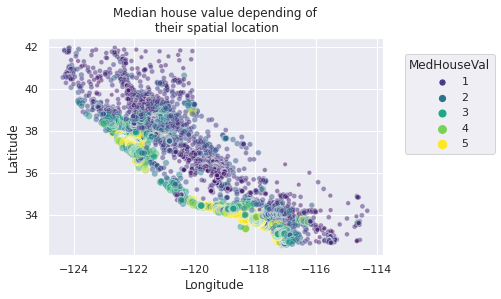

In [405]:
import seaborn as sns

sns.scatterplot(
    data=dataset,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")



In [406]:
## We note that the high-valued houses are located on the coast, where the big cities 
## from California are located: San Diego, Los Angeles, San Jose, or San Francisco

In [407]:
## We can make a final analysis by making a pair plot of all features and the target 
## but dropping the longitude and latitude. We will quantize the target such that we can create proper histogram

In [408]:
import pandas as pd

# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = dataset.drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

In [409]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [410]:
subset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.092
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,4.092
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,4.092
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,4.092
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,4.092
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.565
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.565
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.565
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.565


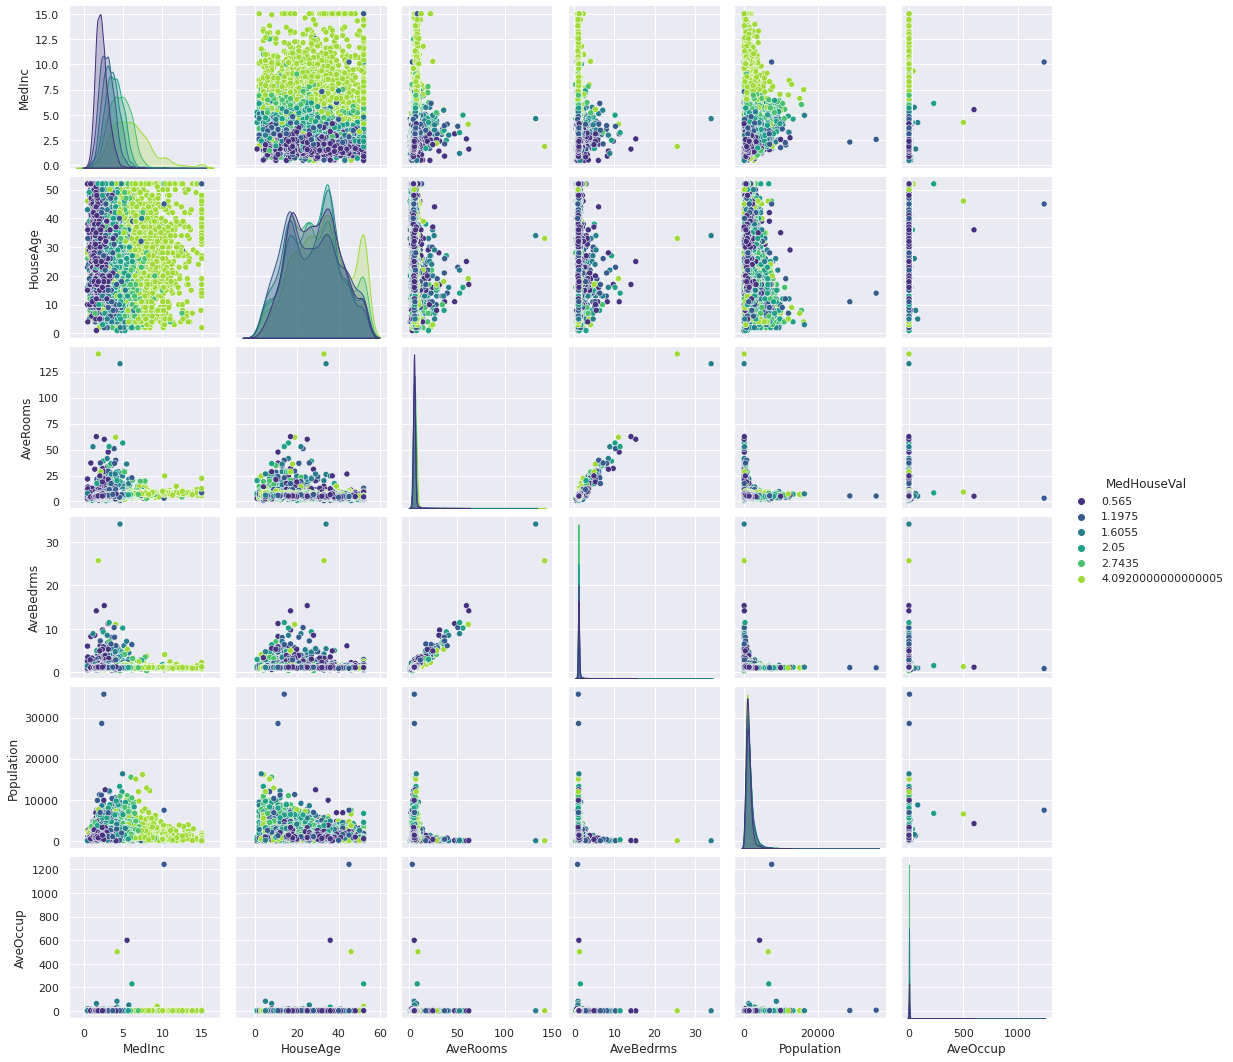

In [411]:
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

Text(0, 0.5, 'Mediam house value in ($100,000)')

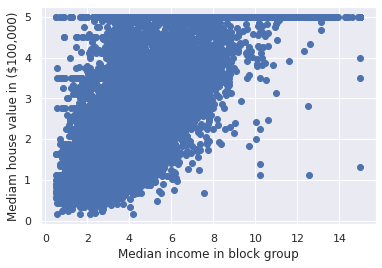

In [412]:
plt.scatter(dataset["MedInc"], dataset["MedHouseVal"])
plt.xlabel("Median income in block group")
plt.ylabel("Mediam house value in ($100,000)")

In [413]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [414]:
dataset[dataset["MedHouseVal"] >=5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


In [415]:
condition = (dataset["MedHouseVal"] >= 5)
dataset = dataset[~condition]

In [416]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19648 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       19648 non-null  float64
 1   HouseAge     19648 non-null  float64
 2   AveRooms     19648 non-null  float64
 3   AveBedrms    19648 non-null  float64
 4   Population   19648 non-null  float64
 5   AveOccup     19648 non-null  float64
 6   Latitude     19648 non-null  float64
 7   Longitude    19648 non-null  float64
 8   MedHouseVal  19648 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


Text(0, 0.5, 'Mediam house value in ($100,000)')

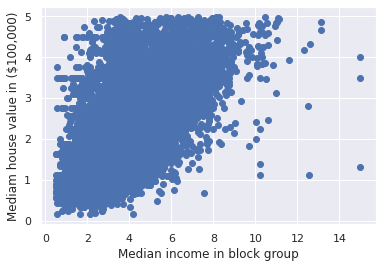

In [417]:
plt.scatter(dataset["MedInc"], dataset["MedHouseVal"])
plt.xlabel("Median income in block group")
plt.ylabel("Mediam house value in ($100,000)")

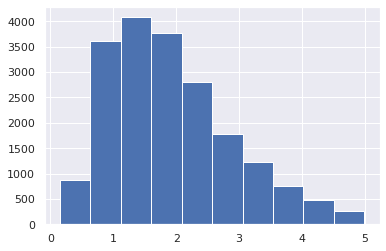

In [418]:
# Plot the histogram
plt.hist(dataset["MedHouseVal"])
plt.show()

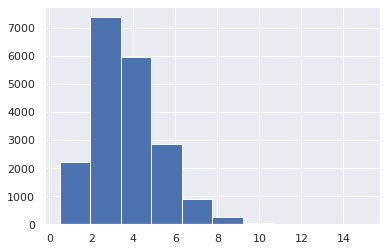

In [419]:
# Plot the histogram
plt.hist(dataset["MedInc"])
plt.show()

 create an interaction term for 2 features longitude and lattitude
dataset.loc[:, 'Coordinates'] = dataset["Latitude"] * dataset["Longitude"]
dataset

dataset = dataset.drop(columns=["Latitude", "Longitude"])

dataset

new_order = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
             'Coordinates', 'MedHouseVal']

dataset = dataset[new_order]

In [420]:
## Independent and dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [421]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [422]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 19648, dtype: float64

In [423]:
## Train and test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [424]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16619,3.0187,16.0,5.796791,1.187166,782.0,2.090909,35.41,-120.87
3645,2.0699,24.0,3.137648,1.064722,4625.0,4.216044,34.22,-118.45
801,4.7083,25.0,5.248260,0.997680,2426.0,2.814385,37.64,-122.07
6834,2.6716,34.0,3.958848,1.019547,2814.0,2.895062,34.08,-118.13
1892,3.5000,26.0,6.373494,1.397590,191.0,2.301205,38.92,-120.00
...,...,...,...,...,...,...,...,...
11877,3.3687,45.0,5.594175,0.998058,1470.0,2.854369,34.00,-117.38
12563,2.9769,43.0,5.082927,1.017073,912.0,2.224390,38.54,-121.43
5631,2.9063,47.0,4.723077,1.061538,374.0,5.753846,33.77,-118.28
870,3.5714,5.0,4.693878,1.269388,648.0,2.644898,37.49,-121.93


In [425]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8979,5.0357,45.0,4.870620,0.956873,883.0,2.380054,34.00,-118.42
17945,4.7604,36.0,5.194444,0.882716,740.0,2.283951,37.33,-121.95
17356,4.8359,18.0,6.557592,0.984293,1162.0,3.041885,34.87,-120.42
3378,3.0795,8.0,4.052402,1.101892,3565.0,2.594614,34.25,-118.29
15797,3.6031,52.0,3.702592,1.062756,1438.0,1.961801,37.77,-122.43
...,...,...,...,...,...,...,...,...
2701,3.2396,33.0,5.460000,1.076000,825.0,3.300000,32.85,-115.57
13145,1.6458,52.0,4.292453,1.000000,429.0,2.023585,38.26,-121.51
8714,6.1133,34.0,6.873418,1.246835,509.0,3.221519,33.85,-118.36
3990,7.6420,23.0,7.232982,0.988495,3221.0,3.088207,34.19,-118.66


In [426]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [427]:
X_train = scaler.fit_transform(X_train)

In [428]:
X_test = scaler.fit_transform(X_test)

# Model Training

In [429]:
from sklearn.linear_model import LinearRegression

In [430]:
regression = LinearRegression()

In [431]:
regression.fit(X_train,y_train)

LinearRegression()

In [432]:
## print the coefficients and the interecept

print(regression.coef_)
print(regression.intercept_)

[ 0.67311771  0.10094909 -0.24868627  0.27945141  0.00715374 -0.03786765
 -0.81346745 -0.78766595]
1.923223876972295


In [433]:
## parameters on which the model has been trained

regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [434]:
## Model prediction with the test data
reg_pred = regression.predict(X_test)

In [435]:
reg_pred

array([2.7902334 , 2.61389198, 2.72140414, ..., 3.14135965, 3.46626217,
       2.76574027])

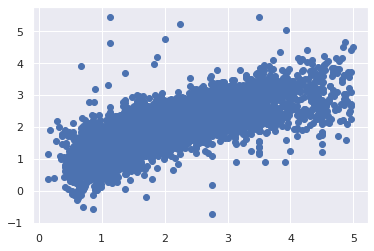

In [436]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [437]:
## Residuals
residuals = y_test - reg_pred
residuals

8979     0.507767
17945    0.333108
17356   -0.764404
3378    -0.119865
15797    0.131376
           ...   
2701    -0.604257
13145   -0.564157
8714     0.351640
3990     0.282738
1528    -0.077740
Name: MedHouseVal, Length: 5895, dtype: float64

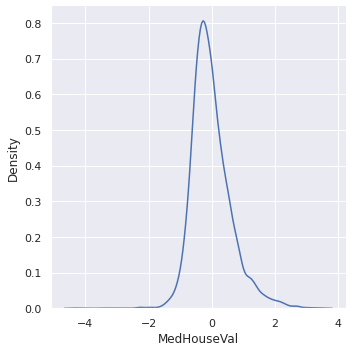

In [438]:
## Plotting the residuals
sns.displot(residuals, kind="kde")

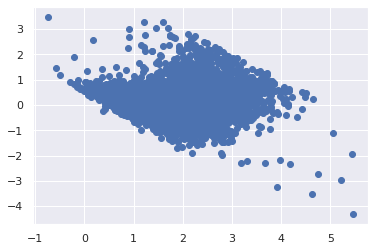

In [439]:
## Scatter plot wrto predictions and residals
## checking if there is uniform distribution
plt.scatter(reg_pred,residuals)

# Performance metrics

In [440]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.47182143782671576
0.39919381494319583
0.6318178653244904


In [441]:
## R square and adjusted R square

In [442]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.5768311265831694


In [443]:
## adjusted R square
1- (1-score) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5762559735102277

# New predictions

In [450]:
housing.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [451]:
housing.data[0].shape

(8,)

In [452]:
housing.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [453]:
##transformation of new data
scaler.transform(housing.data[0].reshape(1,-1))

/home/satishk/.local/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.97698242,  1.02110914,  0.85787897, -0.20378828, -0.9768272 ,
        -0.37765931,  1.06745243, -1.34574751]])

In [454]:
regression.predict(scaler.transform(housing.data[0].reshape(1,-1)))

/home/satishk/.local/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3.95884664])

# Pickling the Model file for Deployment

In [460]:
import pickle

In [461]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [462]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [463]:
pickled_model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

/home/satishk/.local/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([3.95884664])

In [464]:
pickle.dump(scaler,open('scaling.pkl','wb'))